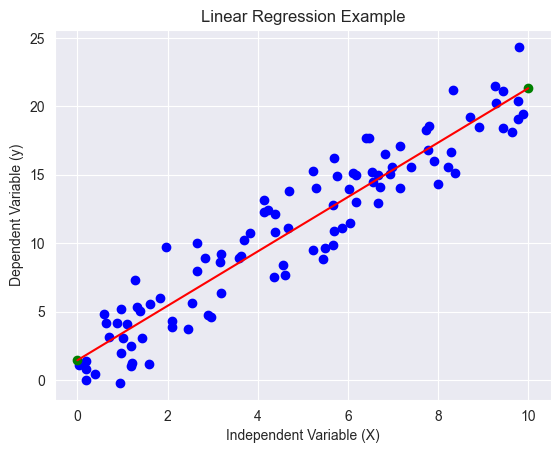

In [117]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create some data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Independent variable (hours studied)
y = 2 * X + 1 + np.random.randn(100, 1) * 2  # Dependent variable (test scores)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
X_new = np.array([[0], [10]])
y_predict = model.predict(X_new)

# Plotting the results
plt.scatter(X, y, color='blue')  # plot the data points
plt.scatter(X_new, y_predict, color='green')  # plot the regression line

m = model.coef_[0]
b = model.intercept_[0]
xx = np.linspace(0, 10, 100)
yy = m*xx+b

plt.plot(xx, yy, color='red')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression Example')
plt.show()

In [118]:
print(model.coef_[0])
print(model.intercept_[0])

[1.987387]
1.4443021548944586


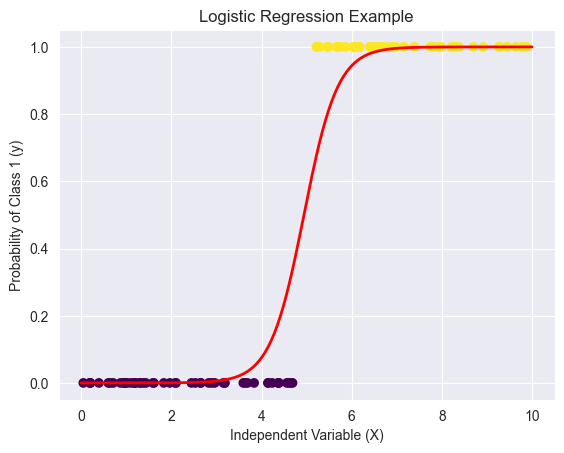

In [62]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Create some data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Independent variable (e.g., hours studied)
y = (X > 5).astype(np.float64).ravel()  # Dependent variable (e.g., pass/fail)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X, y)

# Make predictions
X_test = np.linspace(0, 10, 300)
y_prob = model.predict_proba(X_test.reshape(-1, 1))[:, 1]

# Plotting the results
plt.scatter(X, y, c=y, cmap='viridis')  # plot the data points
plt.plot(X_test, y_prob, color='red', linewidth=2)  # plot the logistic regression curve
plt.xlabel('Independent Variable (X)')
plt.ylabel('Probability of Class 1 (y)')
plt.title('Logistic Regression Example')
plt.show()

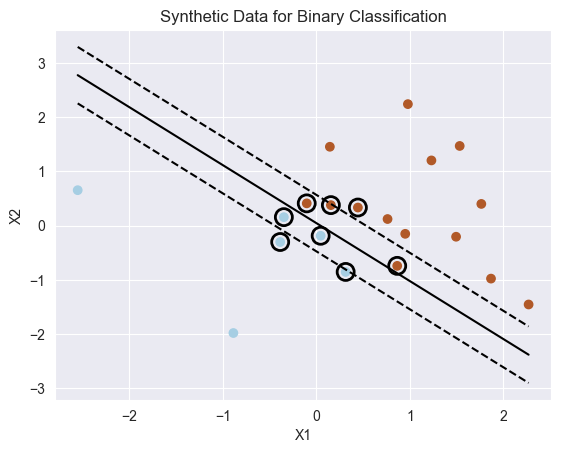

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Create random data
np.random.seed(0)
X = np.random.randn(20, 2)
Y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Create an SVM classifier with a linear kernel
clf = SVC(kernel='linear').fit(X, Y)

# Get hyperplane parameters
w = clf.coef_[0]  # Weight vector
b = clf.intercept_[0]  # Bias term

# Plot decision boundary
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]

# Calculate margins
margin = 1 / np.linalg.norm(w)
y_vals_margin_up = y_vals + margin
y_vals_margin_down = y_vals - margin


# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=150, facecolors='none', edgecolors='k', linewidth=2, label="Support Vectors")

# Plot decision boundary and margins
plt.plot(x_vals, y_vals, 'k-', label="Decision Boundary")
plt.plot(x_vals, y_vals_margin_up, 'k--', label="Margin")
plt.plot(x_vals, y_vals_margin_down, 'k--')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Synthetic Data for Binary Classification")
plt.show()

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.77      0.81      0.79        21

    accuracy                           0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77        40



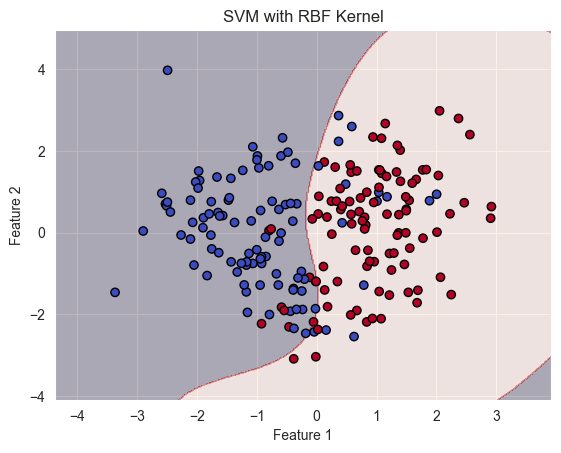

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
X, y = datasets.make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

# Visualizing decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM with RBF Kernel')
    plt.show()

plot_decision_boundary(svm_model, X, y)


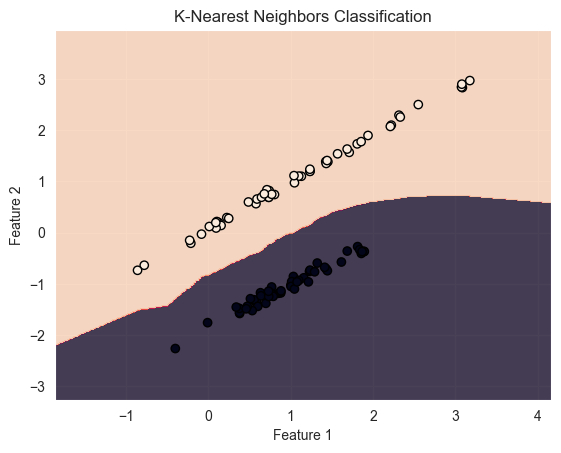

In [45]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a random binary classification problem.
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create a KNN classifier model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X, y)

# We create a mesh of points to visualize the decision boundaries of the KNN classifier
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                 np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the results
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Nearest Neighbors Classification')
plt.show()

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Sample data
# Features: weight (grams), color (0 = Green, 1 = Yellow, 2 = Red)
# Target: types of fruits
features = np.array([[150, 0], [170, 1], [200, 1], [180, 1]])
labels = np.array(["Apple", "Apple", "Banana", "Banana"])

# don't bother for this step, it is just used to encode string labels to integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Creating and training the Naive Bayes model
model = GaussianNB()
model.fit(features, labels_encoded)

# Making predictions
# Let's predict the fruit type for a 160g green fruit and a 190g yellow fruit
predicted = model.predict([[1000, 0]])
predicted_labels = label_encoder.inverse_transform(predicted)

print(f"Predictions: {predicted_labels}")

Predictions: ['Apple']


In [137]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

dt_classifier.feature_importances_


array([0.        , 0.        , 0.92510833, 0.07489167])

In [49]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0
